# <b>1 <span style='color:lightseagreen'>|</span> Introduction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.1 | What is PCA ?</b></p>
</div>

Principal Component Analysis (PCA) is a statistical method that allows simplifying the complexity of sample spaces with many dimensions while preserving their information. Suppose there is a sample with n individuals each with $p$ variables $(X_1, X_2, ..., X_p)$, i.e. the sample space has $p$ dimensions. PCA allows to find a number of underlying factors ($z<p$) that explain approximately the same as the original $p$ variables. Where previously $p$ values were needed to characterise each individual, now $z$ values are sufficient. Each of these z new variables is called principal component.

Principal Component Analysis belongs to the family of techniques known as unsupervised learning. The supervised learning methods aim to predict a response variable Y from a set of predictors. For this purpose, $p$ features ($X_1, X_2 ... X_p$) and the target variable Y measured in $n$ observations are available. In the case of unsupervised learning, the target variable Y is not taken into account since the objective is not to predict Y but to extract information using the predictors, e.g. to identify subgroups. The main problem faced by unsupervised learning methods is the difficulty in validating the results because there is no response variable to test them against.

The PCA method therefore allows the information provided by multiple variables to be "condensed" into just a few components. This makes it a very useful method to apply after using other statistical techniques such as regression, clustering, etc. Even so, it should not be forgotten that it is still necessary to have the value of the original variables to calculate the components. 

# <b>2 <span style='color:lightseagreen'>|</span>Mathematical Concepts</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.1 | Linear Algebra</b></p>
</div>

This section describes two of the mathematical concepts applied in the PCA: eigenvectors and eigenvalues. This is simply an intuitive description with the sole purpose of facilitating the understanding of the principal component calculation.

### 2.1.1 | Eigenvectors

Eigenvectors are a particular case of multiplication between a matrix and a vector. Note the following multiplication:

$$
\begin{equation}
\begin{pmatrix}
2 & 2\\
3 & 1\\
\end{pmatrix}
\begin{pmatrix}
3\\
2
\end{pmatrix}
=
\begin{pmatrix}
3\\
2
\end{pmatrix}
\end{equation} 
$$

The vector resulting from the multiplication is an integer multiple of the original vector. The eigenvectors of a matrix are all those vectors which, when multiplied by that matrix, result in the same vector or an integer multiple of it. Eigenvectors have a number of specific mathematical properties:

* Eigenvectors only exist for square matrices and not for all matrices. In the case of an $n x n$ matrix having eigenvectors, the number of eigenvectors is n.
* If you scale an eigenvector before multiplying it by the matrix, you get a multiple of the same eigenvector. This is because if you scale a vector by multiplying it by a certain amount, you only change its length but the direction is the same.
* All the eigenvectors of a matrix are perpendicular (orthogonal) to each other, regardless of their dimensions.

Given the property that multiplying an eigenvector only changes its length but not its eigenvector nature, it is common to scale them so that their length is 1. In this way they are all standardised. An example is shown below:

The eigenvector $\begin{pmatrix}
3\\
2
\end{pmatrix}$ has a length of $\sqrt{3^2 + 2^2} = \sqrt{13}$. Dividing each dimension by the length of the vector gives the standardised eigenvector with length 1. This vector is called unitary vector in Mathematics.  

### 2.1.2 | Eigenvalue

When a matrix is multiplied by one of its eigenvectors, a multiple of the original vector is obtained, i.e. the result is the same vector multiplied by a number. The value by which the resulting eigenvector is multiplied is known as the eigenvalue. To every eigenvector corresponds an eigenvalue and vice versa.

In the PCA method, each of the components corresponds to an eigenvector, and the component order is established by decreasing order of eigenvalue. Thus, the first component is the eigenvector with the highest associated eigenvalue.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2 | Geometric Interpretation of Principal Components </b></p>
</div>

An intuitive way to understand the PCA process is to interpret the principal components from a geometric point of view. Assume a set of observations for which two variables $(X_1, X_2)$ are available. The vector defining the first principal component $(Z_1)$ follows the direction in which the observations vary the most (red line). The projection of each observation in that direction equals the value of the first component score for that observation (principal component scores, $z_{i1}$).

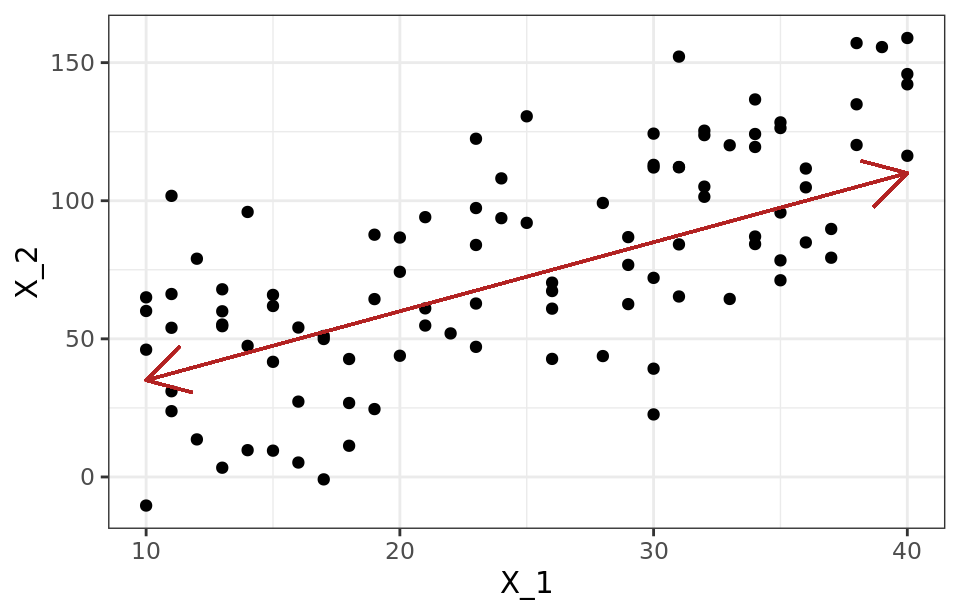

The second component $(Z_2)$ follows the second direction in which the data show the highest variance and which is uncorrelated with the first component. The condition of no correlation between principal components is equivalent to saying that their directions are perpendicular/orthogonal.

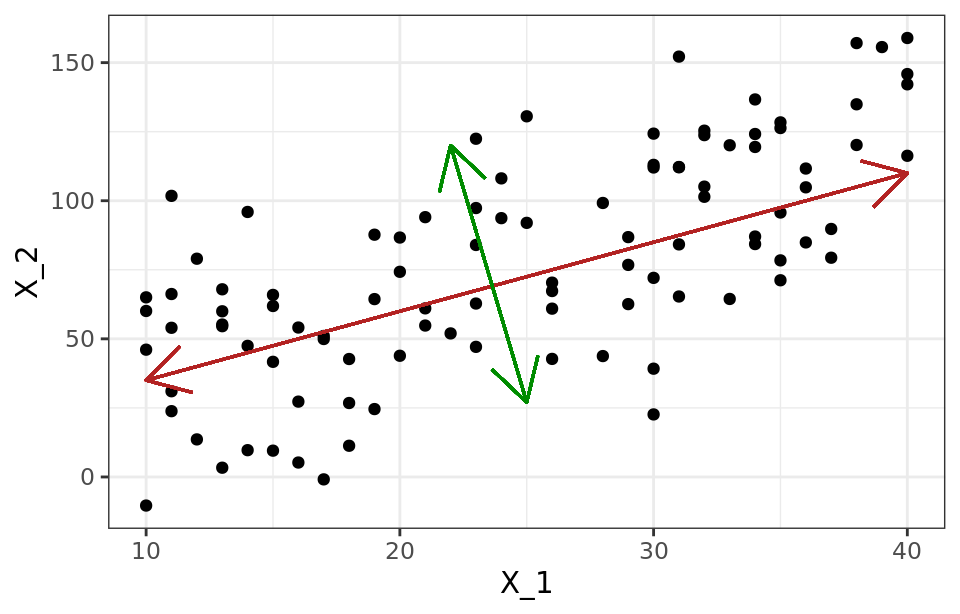

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.3 | Calculating Principal Components </b></p>
</div>

Each principal component $(Z_i)$ is obtained by linear combination of the original variables. They can be understood as new variables obtained by combining the original variables in a certain way. The first principal component of a group of variables $(X_1, X_2, ..., X_p)$ is the normalised linear combination of these variables that has the highest variance:

$$
\begin{equation}
Z_1=\phi_{11}X_1+\phi_{21}X_2+\cdots+\phi_{p1}X_p
\end{equation}
$$

That the linear combination is normalised implies that:

$$
\begin{equation}
\sum_{j=1}^{p}\phi_{j1}^2 = 1
\end{equation}
$$

The terms $\phi_{11} \cdots \phi_{1p}$ are called loadings and define the component $\phi_{11}$ is the loading of the variable $X_1$ of the first principal component. The loadings can be interpreted as the weight/importance that each variable has in each component and, therefore, they help to know what type of information is collected by each of the components.

Given a dataset $X$ with $n$ observations and $p$ variables, the process to be followed to calculate the first principal component is as follows:

* Centralisation of the variables: the mean of the variable to which it belongs is subtracted from each value. This ensures that all the variables have zero mean.
* An optimisation problem is solved to find the value of the loadings with which the variance is maximised. One way to solve this optimisation is by calculating the eigenvector-eigenvalue of the covariance matrix.

Once the first component $(Z_1)$ the second component $(Z_2)$ is calculated by repeating the same process, but adding the condition that the linear combination cannot be correlated with the first component. This is equivalent to saying that $Z_1$ and $Z_2$ must be perpendicular. It's usually said that we have an orthonormal set of vectors {$Z_1, Z_2$}. The process is repeated iteratively until all possible components are calculated $(min(n-1, p))$ or until it is decided to stop the process. The order of importance of the components is given by the magnitude of the eigenvalue associated with each eigenvector.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.4 | Scaling of Variables</b></p>
</div>

The PCA process identifies those directions in which the variance is greatest. As the variance of a variable is measured on its own scale squared, if all variables are not standardised to have mean 0 and standard deviation 1 before calculating the components, those variables whose scale is larger will dominate the rest. Hence, it is always advisable to standardise the data.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.5 | Component reproducibility</b></p>
</div>

The PCA process always generates the same principal components regardless of the software used, i.e. the value of the resulting loadings is the same. The only difference that can occur is that the sign of all loadings is inverted. This is because the vector of loadings determines the direction of the component, and this direction is the same regardless of the sign (the component follows a line extending in both directions). Similarly, the specific value of the components obtained for each observation (principal component scores) is always the same, except for the sign. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.6 | Outliers Influence</b></p>
</div>

When working with variances, the PCA method is highly sensitive to outliers, so it is highly recommended to check for them. The detection of outliers with respect to a given dimension is relatively easy to do by means of graphical checks. However, when dealing with multiple dimensions the process becomes more complicated. For example, consider a man who is 2 metres tall and weighs 50 kg. Neither of the two values are outliers individually, but together they would be very exceptional. The Mahalanobis distance is a measure of distance between a point and the mean that adjusts for correlation between dimensions and allows finding potential outliers in multivariate distributions.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.7 | Explained Variance Ratio</b></p>
</div>

One of the most frequent questions that arises after performing a PCA is: How much information present in the original dataset is lost when projecting the observations into a lower dimensional space? In other words, how much information is able to be captured by each of the principal components obtained? To answer these questions, the proportion of variance explained by each principal component is used.

Assuming that the variables have been normalised to have zero mean, the total variance present in the dataset is defined as

$$
\begin{equation}
\sum_{j=1}^{p} Var(X_j) = \sum_{j=1}^{p} \frac{1}{n} \sum_{i=1}^{n} x_{ij}^{2}
\end{equation}
$$

and the variance explained by the $m$ component is

$$
\begin{equation}
\frac{1}{n} \sum_{i=1}^{n} z_{im}^{2} = \frac{1}{n} \sum_{i=1}^{n} (\sum_{j=1}^{p} \phi_{jm} x_{ij})^2
\end{equation}
$$

Therefore, the proportion of variance explained by the $m$ component is given by the ratio

$$
\begin{equation}
\frac{\sum_{i=1}^{n} (\sum_{j=1}^{p} \phi_{jm} x_{ij})^2}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{ij}^{2}}
\end{equation}
$$

Both the proportion of variance explained and the proportion of variance explained cumulatively are two very useful values when deciding on the number of principal components to use in subsequent analyses. If all the principal components of a dataset are calculated, then, although transformed, all the information present in the original data is being stored. The sum of the cumulative proportion of variance explained by all components is always 1. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.8 | Optimal Number of Principal Components</b></p>
</div>

Generally, given a data matrix of dimension $n$ x $p$, the number of principal components that can be calculated is at most $n-1$ or $p$ (the smaller of the two values is the limiting one). However, since the aim of PCA is to reduce dimensionality, it is often of interest to use the minimum number of components that are sufficient to explain the data. There is no single answer or method to identify the optimal number of principal components to use. A widespread approach is to assess the proportion of cumulative explained variance and select the minimum number of components beyond which the increase is no longer substantial.

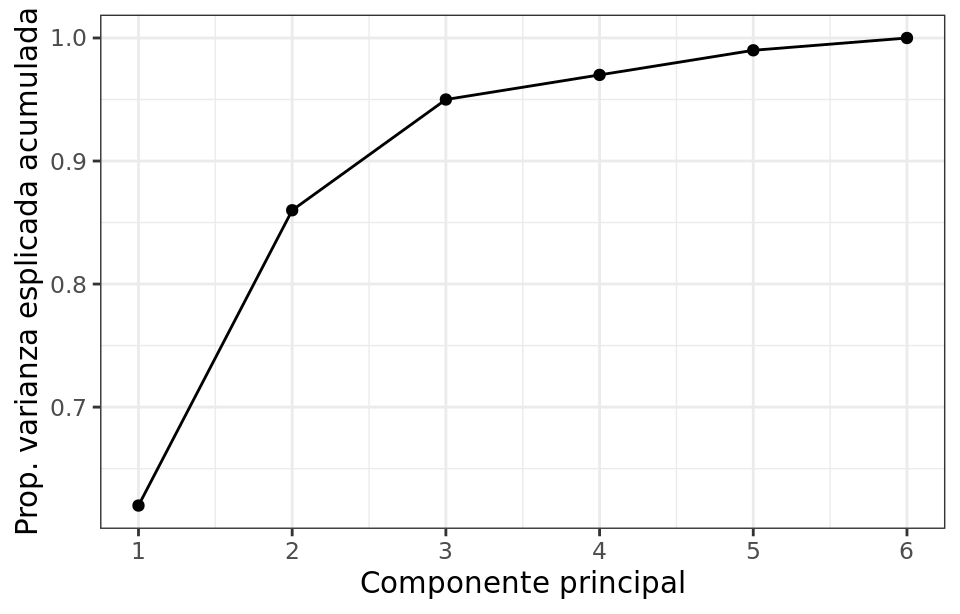

---
# <b>3 <span style='color:lightseagreen'>|</span> PCA for Data Science</b>

---

After the extensive explanatory sections we come to the part that will interest you most. From now on we will calculate the principal components, and put into practice everything we have learned previously. We'll work through several applications of PCA to the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.1 | Feature Engineering</b></p>
</div>

There are two ways you could use PCA for feature engineering.

The first way is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the MI scores for the components and see what kind of variation is most predictive of your target. That could give you ideas for kinds of features to create. You could even try clustering on one or more of the high-scoring components.

The second way is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

* Dimensionality reduction: When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.
* Anomaly detection: Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.
* Noise reduction: A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.
* Decorrelation: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data. You'll no doubt come up with applications of your own!

<div class="alert alert-block alert-info"> 📌 PCA Best Practices. There are a few things to keep in mind when applying PCA:

* PCA only works with numeric features, like continuous quantities or counts.
* PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
* Consider removing or constraining outliers, since they can an have an undue influence on the results. 
</div>

In [ ]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex5 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


df = pd.read_csv("../input/fe-course-data/ames.csv")

Let's choose a few features that are highly correlated with our target, `SalePrice`.

In [ ]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print("Correlation with SalePrice:\n")
print(df[features].corrwith(df.SalePrice))

We'll rely on PCA to untangle the correlational structure of these features and suggest relationships that might be usefully modeled with new features. Run this cell to apply PCA and extract the loadings.

In [ ]:
X = df.copy()
y = X.pop("SalePrice")
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

In [ ]:
plot_variance(pca)

### 3.1.1 | Interpret Component Loadings

Look at the loadings for components `PC1` and `PC3`. Can you think of a description of what kind of contrast each component has captured? After you've thought about it, run the next cell for a solution.

In [ ]:
# View the solution (Run this cell to receive credit!)
q_1.check()

-------------------------------------------------------------------------------

Your goal in this question is to use the results of PCA to discover one or more new features that improve the performance of your model. One option is to create features inspired by the loadings, like we did in the tutorial. Another option is to use the components themselves as features (that is, add one or more columns of `X_pca` to `X`).

### 3.1.2 | Create New Features

Add one or more new features to the dataset `X`. For a correct solution, get a validation score below 0.140 RMSLE. (If you get stuck, feel free to use the `hint` below!). For this first option we'll create some new features based on what PCA tells about the relations between previous features. 

In [ ]:
X = df.copy()
y = X.pop("SalePrice")

# YOUR CODE HERE: Add new features to X.
X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

# Check your answer
q_2.check()

In [ ]:
# Lines below will give you a hint or solution code
#q_2.hint()
#q_2.solution()

In [ ]:
X = df.copy()
X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF
sns.regplot(x="Feature1", y='SalePrice', data=X);

In [ ]:
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF
sns.regplot(x="Feature2", y='SalePrice', data=X);

Let's go on with 2nd option. We'll use now principal components as features. 

In [ ]:
# Solution 2: Uses components
X = X.join(X_pca)
y = X.pop("SalePrice")

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

-------------------------------------------------------------------------------

The next question explores a way you can use PCA to detect outliers in the dataset (meaning, data points that are unusually extreme in some way). Outliers can have a detrimental effect on model performance, so it's good to be aware of them in case you need to take corrective action. PCA in particular can show you anomalous *variation* which might not be apparent from the original features: neither small houses nor houses with large basements are unusual, but it is unusual for small houses to have large basements. That's the kind of thing a principal component can show you.

Run the next cell to show distribution plots for each of the principal components you created above.

In [ ]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

As you can see, in each of the components there are several points lying at the extreme ends of the distributions -- outliers, that is.

Now run the next cell to see those houses that sit at the extremes of a component:

In [ ]:
# You can change PC1 to PC2, PC3, or PC4
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

### 3.1.3 | Outlier Detection

Do you notice any patterns in the extreme values? Does it seem like the outliers are coming from some special subset of the data? After you've thought about your answer, run the next cell for the solution and some discussion.

In [ ]:
# View the solution (Run this cell to receive credit!)
q_3.check()

In addition, I'll include how I always try to detect outliers. As it's well known, an outlier can be of two types: Univariate and Multivariate. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. We'll start by detecting whether there are univariate outliers in our dataset or not. 

### 3.1.4 | Univariate Outliers

#### 3.1.4.1 | Grubbs Test

$$
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }}  {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{1}} :}  {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
$$
$$
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{SD}} \\ {\text { with } \overline{X} \text { and } SD \text { denoting the sample mean and standard deviation, respectively. }} \end{array}
$$
$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$
$$
\begin{array}{l}{\text { If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier }}\end{array}$$

In [ ]:
import scipy.stats as stats
def grubbs_test(x, feature):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Feature:", feature)
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
    
    print("==============================================================================================================================================")
    
grubbs_test(X['PC1'], 'PC1')
grubbs_test(X['PC2'], 'PC2')
grubbs_test(X['PC3'], 'PC3')
grubbs_test(X['PC4'], 'PC4')

#### 3.1.4.2 | Z-score method

Using Z score method,we can find out how many standard deviations value away from the mean. 

![minipic](https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg)

 Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

$\begin{array}{l} {R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}  \end{array}$

If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.

In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    row = 0
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(row)
        row += 1
    return out

Zscore_outlier(X['PC1'])

#### 3.1.4.3 | Isolation Forest

[Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) is implemented in scikit-learn. 
Isolation forest is an algorithm to detect outliers. It partitions the data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell apart outliers from normal observations.
An important concept in this method is the isolation number. The isolation number is the number of splits needed to isolate a data point. This number of splits is ascertained by following these steps:

* A point “a” to isolate is selected randomly.
* A random data point “b” is selected that is between the minimum and maximum value and different from “a”.
* If the value of “b” is lower than the value of “a”, the value of “b” becomes the new lower limit.
* If the value of “b” is greater than the value of “a”, the value of “b” becomes the new upper limit.
* This procedure is repeated as long as there are data points other than “a” between the upper and the lower limit.

It requires fewer splits to isolate an outlier than it does to isolate a non-outlier, i.e. an outlier has a lower isolation number in comparison to a non-outlier point. A data point is therefore defined as an outlier if its isolation number is lower than the threshold. The threshold is defined based on the estimated percentage of outliers in the data, which is the starting point of this outlier detection algorithm.

![](https://www.kaggleusercontent.com/kf/33744443/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..8nGSn_Y5wFxWrNoIVVu6ew.dLV2C-XFHADo38CTSmX2o7tDuQZNl1RY02dizN_eFKjvPYnZR5yd3p6UKLtvB_j88LbdYZzDztJPobIykrcFD7jCZgGUXD-mOgKiBIXlWZYHKtQhhqaPFWkgBIz68fR2pkmu3spDf4k6CE5vtmoYyk9vpal13mgIwTebfqGFHoS_MVnjqAqb1vATxA8kA3m_7yQbilWntvPapMMs8f0gc6FzhbTprW4D-lC7MjbL6vrzTvvXhZlaEnEGvY1nTQqlia2sJk8fV2GhLJH9R8k32VE8oxmI592Xly6S-y2aN2huiKAX7yzzz9qEgIA3qXuNyzA2gZePG69uEgBjAjC_p2rUmVSshIjauPz-fj0sQHXXjmdSCjQErQ6lYFhob-Vo2XIC-CNpN3n1qJ_A77CHXgFu5zimbP-WnNZKiOiowyEI6MbH-9LGIrZBXiokrsx_Lwkv7eOyzr3jJ5ptXHU0S3aBYPM8dlHKroRpkfrlpNK0oITbrABJOTgFU3ZUM9Ilh6ie3ZZpWK-ijjTWSB513KvotTm5kMLQDV1nRN67KjRt3gQYrtg-toELsD57P18ZqGfOAT8ebArZa1p4QsDnNu7Cf5cQBn3o_85-uMosbQVdQRGGvHgWSRgiKUhT1MlZCNyFaMu0GxNkYWhl8M0NI_DV_Rrb9os512Dq7VWnWP8-LkMKjjKw8WiiIgM_8Rx3.SdNVeAUMSsMbl6mjz4Uo9w/__results___files/__results___77_0.png)

In [ ]:
from sklearn.ensemble import IsolationForest
fig, axs = plt.subplots(2, 3, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(X[['PC1','PC2','PC3','PC3','GrLivArea','TotalBsmtSF']].columns):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(X[column].values.reshape(-1,1))

    xx = np.linspace(X[column].min(), X[column].max(), len(X)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

Let's analyse for example how much ratio of outliers are in `TotalBsmtSF` feature. 

In [ ]:
X[(X['TotalBsmtSF'] > 2000) | (X['TotalBsmtSF'] < 650)].shape[0] / X.shape[0]

### 3.1.5 | Multivariate Outliers

I will show multivariate outlier detection using two scikit-learn methods: For normally distributed data, use EllipticEnvelope.

#### 3.1.5.1 | EllipticEnvelope

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
clf = EllipticEnvelope()

cols = ['PC1','PC2']
X2 = X[cols].copy()

legend = {}
xx, yy = np.meshgrid(np.linspace(-35, 35, 500), np.linspace(-35, 35, 500))
plt.figure(1, figsize=(10,10))
clf.fit(X2.values[:,:2])
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
legend['EllipticEnvelope'] = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors=['m'])

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

plt.figure(1, figsize=(10,10))# two clusters
plt.title("Outlier detection on first two columns of dummydf")
plt.scatter(X2.values[:, 0], X.values[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))
plt.legend(legend_values_list[0].collections, legend_keys_list,
           loc="upper center");
plt.ylabel(X2.columns[1]);
plt.xlabel(X2.columns[0]);

#### 3.1.5.2 | DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.
I will show you an example of using DBScan but before we start, let’s cover some important concepts. DBScan has three important concepts:

- Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.
- Border Points are in the same cluster as core points but much further away from the centre of the cluster.
- Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.

![](https://www.kaggleusercontent.com/kf/33744443/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..8nGSn_Y5wFxWrNoIVVu6ew.dLV2C-XFHADo38CTSmX2o7tDuQZNl1RY02dizN_eFKjvPYnZR5yd3p6UKLtvB_j88LbdYZzDztJPobIykrcFD7jCZgGUXD-mOgKiBIXlWZYHKtQhhqaPFWkgBIz68fR2pkmu3spDf4k6CE5vtmoYyk9vpal13mgIwTebfqGFHoS_MVnjqAqb1vATxA8kA3m_7yQbilWntvPapMMs8f0gc6FzhbTprW4D-lC7MjbL6vrzTvvXhZlaEnEGvY1nTQqlia2sJk8fV2GhLJH9R8k32VE8oxmI592Xly6S-y2aN2huiKAX7yzzz9qEgIA3qXuNyzA2gZePG69uEgBjAjC_p2rUmVSshIjauPz-fj0sQHXXjmdSCjQErQ6lYFhob-Vo2XIC-CNpN3n1qJ_A77CHXgFu5zimbP-WnNZKiOiowyEI6MbH-9LGIrZBXiokrsx_Lwkv7eOyzr3jJ5ptXHU0S3aBYPM8dlHKroRpkfrlpNK0oITbrABJOTgFU3ZUM9Ilh6ie3ZZpWK-ijjTWSB513KvotTm5kMLQDV1nRN67KjRt3gQYrtg-toELsD57P18ZqGfOAT8ebArZa1p4QsDnNu7Cf5cQBn3o_85-uMosbQVdQRGGvHgWSRgiKUhT1MlZCNyFaMu0GxNkYWhl8M0NI_DV_Rrb9os512Dq7VWnWP8-LkMKjjKw8WiiIgM_8Rx3.SdNVeAUMSsMbl6mjz4Uo9w/__results___files/__results___84_0.png)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# scale data first
X = StandardScaler().fit_transform(X2[cols].values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

pd.Series(labels).value_counts()

Visualize the outlier samples in the context of the first two features, Rooms and Price

In [ ]:
plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel(X2.columns[0]);
plt.ylabel(X2.columns[1]);

# <b>4 <span style='color:lightseagreen'>|</span>References</b>

* [Análisis de Componentes Principales](https://www.cienciadedatos.net/documentos/35_principal_component_analysis)
* [Kaggle PCA Module, from Feature Engineering Course](https://www.kaggle.com/learn/feature-engineering)
* [Outlier Detection Techniques: Simplified](https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified#1)-DBSCAN-(Density-Based-Spatial-Clustering-of-Applications-with-Noise):)
* [Outlier Detection Practice: uni/multivariate](https://www.kaggle.com/code/kevinarvai/outlier-detection-practice-uni-multivariate#Table-of-Contents)